In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using ForwardDiff
using BenchmarkTools

In [2]:
function cov_matr(smpl_tmp)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

function predict_position(x0, y0, θ, α; s = Float64[1.478, 15.026, 23.1150])
    x_expected = x0 .+ cos(α).*θ.*s.*10^6
    y_expected = y0 .+ sin(α).*θ.*s.*10^6
    return (x_expected, y_expected)
end

prior_ang = NamedTupleDist(
    θ = [10^-15 .. 10^-4 for i in 1:50],
    α = [0 .. 2*pi  for i in 1:50],
    x_alignm = [-200 .. 200 for i in 1:3],
    y_alignm = [-200 .. 200 for i in 1:3],
    σ = [6.23, 32.9, 35.1],
);

In [3]:
@load "../../data/sampling_results/Benchmark-9/mcmc-summary-data.jld" summary_data

1-element Array{Symbol,1}:
 :summary_data

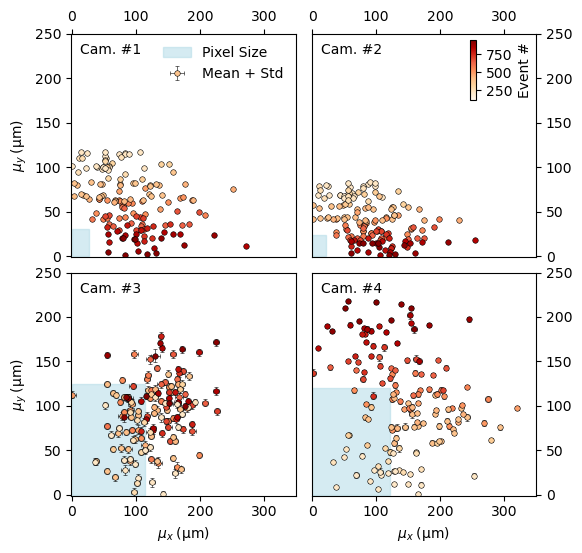

PyObject Text(29.300000000000004, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [4]:
runind_n = summary_data.ev_index ./ maximum(summary_data.ev_index)

fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end


x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

cb = ax[3].scatter(summary_data.ev_charge, summary_data.ev_charge, s=0.0, c=summary_data.ev_index, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.79,0.77,0.01,0.1])
fig.colorbar(cb, spacing="proportional", label="Event #", cax=ax_ins_3)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. #1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. #2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. #3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. #4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

# Sampling: 

In [5]:
sampling_ind = 1:50 
n_events = length(sampling_ind)

prior_ang = NamedTupleDist(
    θ = [10^-15 .. 10^-4 for i in 1:n_events],
    α = [0 .. 2*pi  for i in 1:n_events],
    x_alignm = [-200 .. 200 for i in 1:3],
    y_alignm = [-200 .. 200 for i in 1:3],
    σ = [6.23, 32.9, 35.1],
);

In [6]:
smpl_tmp = bat_read("../../data/sampling_results/Benchmark-9/samples-1-50.hdf5")
samples_1 = varshape(prior_ang).(smpl_tmp);

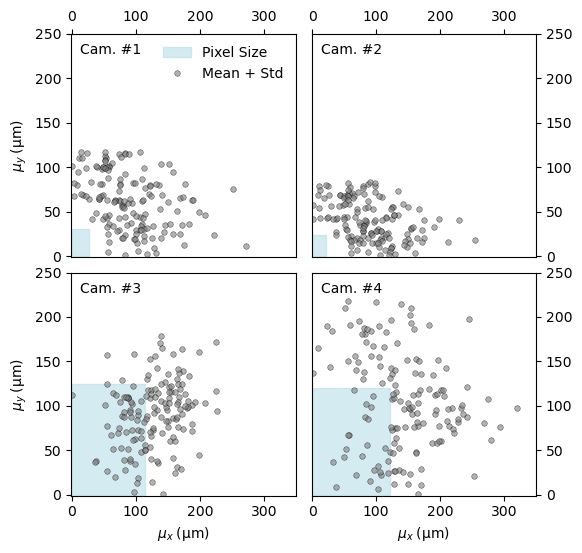

PyObject Text(29.300000000000004, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [7]:
fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. #1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. #2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. #3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. #4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

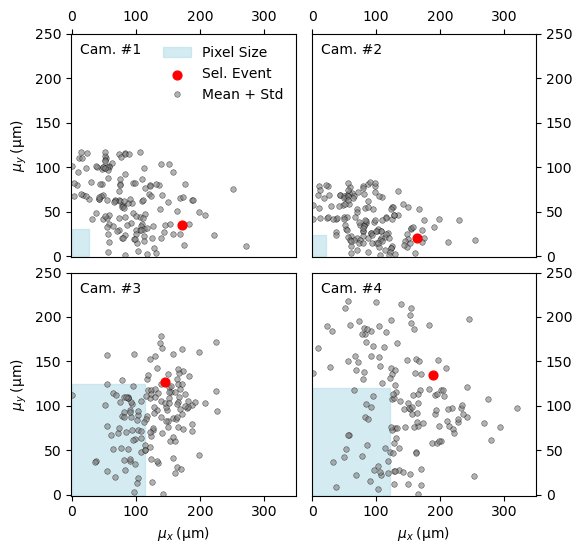

PyObject Text(29.300000000000004, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [21]:
par_ind = 48
event_ind = sampling_ind[par_ind]

fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[3].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[2].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[4].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end
ax[1].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4, label="Sel. Event")

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. #1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. #2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. #3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. #4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

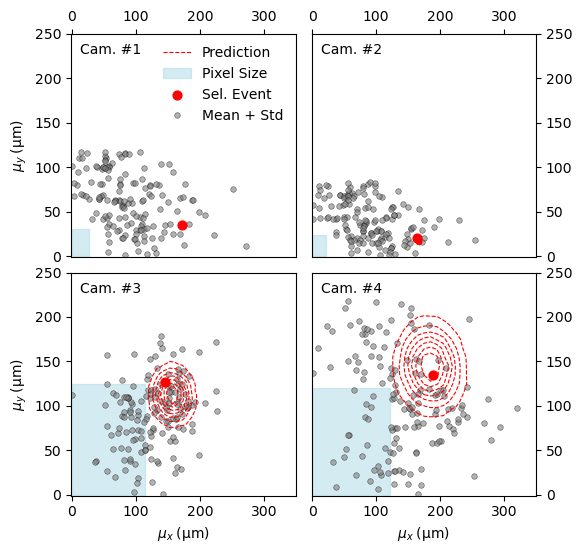

PyObject Text(29.300000000000004, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [22]:
fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[3].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[2].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[4].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end
ax[1].plot([-10, -10, ], [-10, -10], color="red", linestyle="--", linewidth=0.8, alpha=1, label="Prediction")
ax[1].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4, label="Sel. Event")

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)


# Plot Contours: 

v1 = Float64[]
v2 = Float64[]
v3 = Float64[]
v4 = Float64[]
v5 = Float64[]
v6 = Float64[]
 
for i in samples_1.v
    pred_x, pred_y = predict_position(x_tmp[event_ind], y_tmp[event_ind], i.θ[par_ind], i.α[par_ind])
    pred_x += i.x_alignm
    pred_y += i.y_alignm
    
    push!(v1, pred_x[1])
    push!(v2, pred_y[1])
    
    push!(v3, pred_x[2])
    push!(v4, pred_y[2])
    
    push!(v5, pred_x[3])
    push!(v6, pred_y[3])
end

hist_tmp_1 = fit(Histogram, (v1, v2), FrequencyWeights(samples_1.weight), nbins=40)
hist_tmp_2 = fit(Histogram, (v3, v4), FrequencyWeights(samples_1.weight), nbins=40)
hist_tmp_3 = fit(Histogram, (v5, v6), FrequencyWeights(samples_1.weight), nbins=40)

ax[3].contour(midpoints(hist_tmp_1.edges[1]), midpoints(hist_tmp_1.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_1.weights)', 
    colors="red", linestyles="--", alpha=1, antialiased=true, zorder=3) 

ax[2].contour(midpoints(hist_tmp_2.edges[1]), midpoints(hist_tmp_2.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_2.weights)', 
    colors="red", linestyles="--", linewidths=0.8, alpha=1, antialiased=true, zorder=3)

ax[4].contour(midpoints(hist_tmp_3.edges[1]), midpoints(hist_tmp_3.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_3.weights)', 
    colors="red", linestyles="--", linewidths=0.8, alpha=1, antialiased=true, zorder=3)

# ***

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. #1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. #2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. #3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. #4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

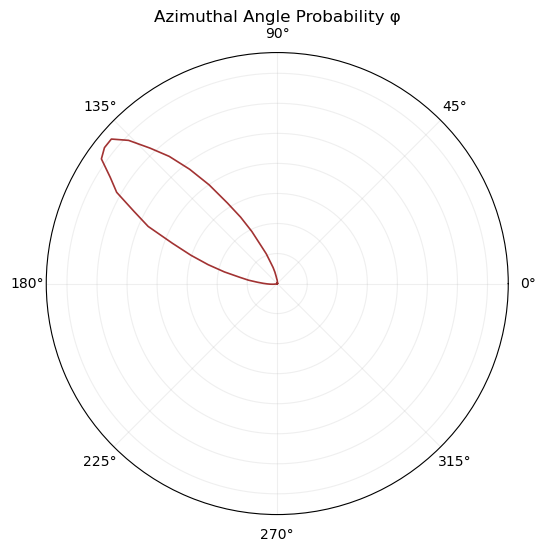

PyObject Text(0.5, 1.05, 'Azimuthal Angle Probability φ')

In [31]:
dt = Float64[i[par_ind] for i in samples_1.v.α]
hist_v = fit(Histogram, dt, FrequencyWeights(round.(Int64, samples_1.weight)), nbins=120)
hist_v = normalize(hist_v, mode=:pdf)

fig = figure(figsize=(6,6))

ax = PyPlot.axes(polar="true") # Create a polar axis

ax.plot(midpoints(hist_v.edges[1]), 
        hist_v.weights, 
        lw=1.2,  "o-", 
        color= "darkred", 
        alpha=0.8, 
        marker="None") 


ax.grid(alpha=0.2)
ax.set_yticklabels([])
ax.set_title("Azimuthal Angle Probability φ")

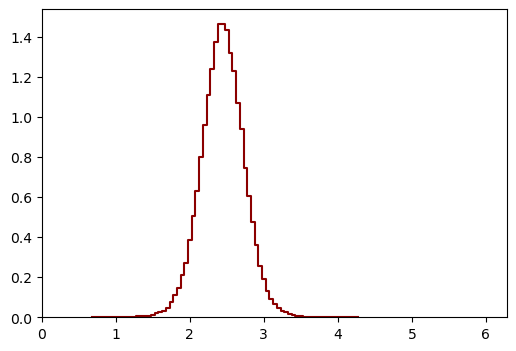

(0.0, 6.283185307179586)

In [35]:
fig, ax= plt.subplots(1,1, figsize=(6,4))

ax.step(midpoints(hist_v.edges[1]), hist_v.weights, color="darkred")
ax.set_ylim(bottom=0.0)
ax.set_xlim(0, 2*pi)

## Average Alignment Distribution:

In [36]:
function hist_2d(smpl_tmp, dim_1, dim_2; nbins=30)
    smpl_tmp, smpl_w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
#     hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

flat(smpl_tmp) = flatview(unshaped.(smpl_tmp.v))

flat (generic function with 1 method)

In [37]:
smpl_tmp = bat_read("../../data/sampling_results/Benchmark-9/samples-1-50.hdf5")
samples_1 = varshape(prior_ang).(smpl_tmp);


In [38]:
smpl_tmp = bat_read("../../data/sampling_results/Benchmark-9/samples-51-100.hdf5")
samples_2 = varshape(prior_ang).(smpl_tmp);

In [39]:
smpl_tmp = bat_read("../../data/sampling_results/Benchmark-9/samples-101-150.hdf5")
samples_3 = varshape(prior_ang).(smpl_tmp);

In [40]:
hist_11 = hist_2d(samples_1, 101,104)
hist_12 = hist_2d(samples_1, 102,105)
hist_13 = hist_2d(samples_1, 103,106);

In [41]:
hist_21 = hist_2d(samples_2, 101,104)
hist_22 = hist_2d(samples_2, 102,105)
hist_23 = hist_2d(samples_2, 103,106);

In [42]:
hist_31 = hist_2d(samples_3, 101,104)
hist_32 = hist_2d(samples_3, 102,105)
hist_33 = hist_2d(samples_3, 103,106);

In [43]:
μ_1x = mean([flat(samples_1)[101, :]; flat(samples_2)[101, :]; flat(samples_3)[101, :]])
μ_1y = mean([flat(samples_1)[104, :]; flat(samples_2)[104, :]; flat(samples_3)[104, :]])

σ_1x = std([flat(samples_1)[101, :]; flat(samples_2)[101, :]; flat(samples_3)[101, :]])
σ_1y = std([flat(samples_1)[104, :]; flat(samples_2)[104, :]; flat(samples_3)[104, :]])

μ_1 = (μ = [μ_1x, μ_1y], σ=[σ_1x, σ_1y])

(μ = [0.500927580989227, -23.4513020674863], σ = [2.076544747557648, 4.2298297350062795])

In [44]:
μ_1x = mean([flat(samples_1)[102, :]; flat(samples_2)[102, :]; flat(samples_3)[102, :]])
μ_1y = mean([flat(samples_1)[105, :]; flat(samples_2)[105, :]; flat(samples_3)[105, :]])

σ_1x = std([flat(samples_1)[102, :]; flat(samples_2)[102, :]; flat(samples_3)[102, :]])
σ_1y = std([flat(samples_1)[105, :]; flat(samples_2)[105, :]; flat(samples_3)[105, :]])

μ_2 = (μ = [μ_1x, μ_1y], σ=[σ_1x, σ_1y])

(μ = [43.28560581434859, 13.391397158346424], σ = [14.68665740165526, 40.87789105337831])

In [45]:
μ_1x = mean([flat(samples_1)[103, :]; flat(samples_2)[103, :]; flat(samples_3)[103, :]])
μ_1y = mean([flat(samples_1)[106, :]; flat(samples_2)[106, :]; flat(samples_3)[106, :]])

σ_1x = std([flat(samples_1)[103, :]; flat(samples_2)[103, :]; flat(samples_3)[103, :]])
σ_1y = std([flat(samples_1)[106, :]; flat(samples_2)[106, :]; flat(samples_3)[106, :]])

μ_3 = (μ = [μ_1x, μ_1y], σ=[σ_1x, σ_1y])

(μ = [61.75332399090809, 17.523243119126985], σ = [30.117323134353573, 61.52007358459907])

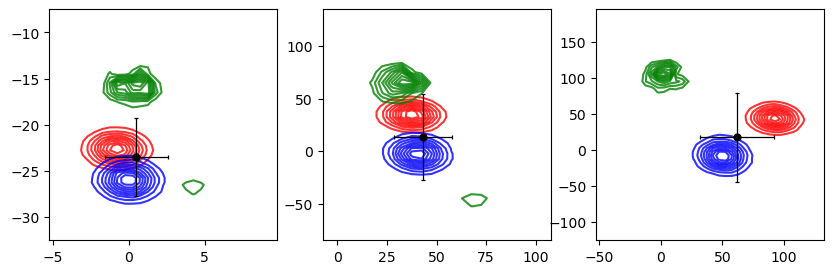

(PyObject <matplotlib.lines.Line2D object at 0x7f9a98251430>, (PyObject <matplotlib.lines.Line2D object at 0x7f9a981db160>, PyObject <matplotlib.lines.Line2D object at 0x7f9a981db460>, PyObject <matplotlib.lines.Line2D object at 0x7f9a981db580>, PyObject <matplotlib.lines.Line2D object at 0x7f9a981db880>), (PyObject <matplotlib.collections.LineCollection object at 0x7f9a981db1c0>, PyObject <matplotlib.collections.LineCollection object at 0x7f9a981db5e0>))

In [46]:
fig, ax= plt.subplots(1,3, figsize=(10,3), ) #sharex=true, sharey=true

ax[1].contour(midpoints(hist_11.edges[1]), midpoints(hist_11.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_11.weights)', 
    levels=range(minimum(hist_11.weights), maximum(hist_11.weights), length=11)[2:end], colors="red", alpha=0.8, antialiased=true)

ax[2].contour(midpoints(hist_12.edges[1]), midpoints(hist_12.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_12.weights)', 
    levels=range(minimum(hist_12.weights), maximum(hist_12.weights), length=11)[2:end], colors="red", alpha=0.8, antialiased=true)

ax[3].contour(midpoints(hist_13.edges[1]), midpoints(hist_13.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_13.weights)', 
    levels=range(minimum(hist_13.weights), maximum(hist_13.weights), length=11)[2:end], colors="red", alpha=0.8, antialiased=true)
# ***
ax[1].contour(midpoints(hist_21.edges[1]), midpoints(hist_21.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_21.weights)', 
    levels=range(minimum(hist_21.weights), maximum(hist_21.weights), length=11)[2:end], colors="blue", alpha=0.8, antialiased=true)

ax[2].contour(midpoints(hist_22.edges[1]), midpoints(hist_22.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_22.weights)', 
    levels=range(minimum(hist_22.weights), maximum(hist_22.weights), length=11)[2:end], colors="blue", alpha=0.8, antialiased=true)

ax[3].contour(midpoints(hist_23.edges[1]), midpoints(hist_23.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_23.weights)', 
    levels=range(minimum(hist_23.weights), maximum(hist_23.weights), length=11)[2:end], colors="blue", alpha=0.8, antialiased=true)
# ***

ax[1].contour(midpoints(hist_31.edges[1]), midpoints(hist_31.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_31.weights)', 
    levels=range(minimum(hist_31.weights), maximum(hist_31.weights), length=11)[2:end], colors="green", alpha=0.8, antialiased=true)

ax[2].contour(midpoints(hist_32.edges[1]), midpoints(hist_32.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_32.weights)', 
    levels=range(minimum(hist_32.weights), maximum(hist_32.weights), length=11)[2:end], colors="green", alpha=0.8, antialiased=true)

ax[3].contour(midpoints(hist_33.edges[1]), midpoints(hist_33.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_33.weights)', 
    levels=range(minimum(hist_33.weights), maximum(hist_33.weights), length=11)[2:end], colors="green", alpha=0.8, antialiased=true)

ax[1].errorbar(μ_1.μ[1], μ_1.μ[2], xerr=μ_1.σ[1], yerr=μ_1.σ[2], 
        color="k", 
        fmt="o", markersize=5,
        mfc="k", #red
        markeredgecolor = "k", markeredgewidth=0.9,
        capsize=1.5, ecolor="k", elinewidth=0.9,)

ax[2].errorbar(μ_2.μ[1], μ_2.μ[2], xerr=μ_2.σ[1], yerr=μ_2.σ[2], 
        color="k", 
        fmt="o", markersize=5,
        mfc="k", #red
        markeredgecolor = "k", markeredgewidth=0.9,
        capsize=1.5, ecolor="k", elinewidth=0.9,)

ax[3].errorbar(μ_3.μ[1], μ_3.μ[2], xerr=μ_3.σ[1], yerr=μ_3.σ[2], 
        color="k", 
        fmt="o", markersize=5,
        mfc="k", #red
        markeredgecolor = "k", markeredgewidth=0.9,
        capsize=1.5, ecolor="k", elinewidth=0.9,)

# ax[1].set_xlim(-200, 200)
# ax[1].set_ylim(-200, 200)